In [1]:
import cv2
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

# Read file and preview

In [16]:
image = cv2.imread('sample.png')

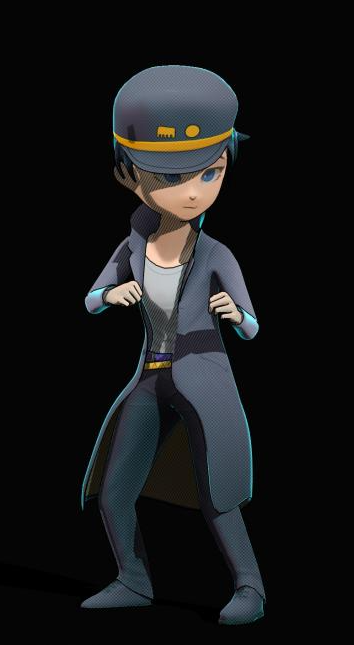

In [17]:
cv2_imshow(image)

# Pooling

In [18]:
from skimage.measure import block_reduce

In [19]:
middle = cv2.GaussianBlur(image,(5,5), sigmaX=0, sigmaY=0)
pooled = block_reduce(middle, block_size=(10, 10, 1), func=np.max)

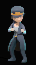

In [20]:
cv2_imshow(pooled)

## KMeans clustering of colors processing without random shuffling

In [21]:
def segmentation(img, k):
    
    imgC = np.copy(img)
    
    h = img.shape[0]
    w = img.shape[1]
    
    imgC.shape = (img.shape[0] * img.shape[1], 3)
    
    #5. Run k-means on the vectorized responses X to get a vector of labels (the clusters); 
    #  
    kmeans = KMeans(n_clusters=k, random_state=0).fit(imgC).labels_
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    kmeans.shape = (h, w)

    return kmeans

In [22]:
def color_replace(idx, img, k):
    clusterValues = []
    for _ in range(0, k):
        clusterValues.append([])
    
    for r in range(0, idx.shape[0]):
        for c in range(0, idx.shape[1]):
            clusterValues[idx[r][c]].append(img[r][c])

    imgC = np.copy(img)

    clusterAverages = []
    for i in range(0, k):
        clusterAverages.append(np.average(clusterValues[i], axis=0))
    
    for r in range(0, idx.shape[0]):
        for c in range(0, idx.shape[1]):
            imgC[r][c] = clusterAverages[idx[r][c]]
            
    return imgC

In [23]:
def Kmean_process(img, k):
    idx = segmentation(img, k)
    return color_replace(idx, img, k)

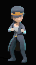

In [24]:
clustered = Kmean_process(pooled, 128)
cv2_imshow(clustered)

In [25]:
def pixelate(img, w, h):
    height, width = img.shape[:2]

    # Resize input to "pixelated" size
    temp = cv2.resize(img, (w, h), interpolation=cv2.INTER_LINEAR)

    # Initialize output image
    return cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)

In [26]:
img16 = pixelate(clustered, 40, 40)
cv2.imwrite('test.png', img16)

True

## KMeans clustering of colors processing WITH RANDOM SHUFFLING

In [27]:
def color_replace_shuffle(idx, img, k):
    clusterValues = []
    for _ in range(0, k):
        clusterValues.append([])
    
    for r in range(0, idx.shape[0]):
        for c in range(0, idx.shape[1]):
            clusterValues[idx[r][c]].append(img[r][c])

    imgC = np.copy(img)

    clusterAverages = []
    for i in range(0, k):
        clusterAverages.append(np.average(clusterValues[i], axis=0))
    
    np.random.shuffle(clusterAverages)

    for r in range(0, idx.shape[0]):
        for c in range(0, idx.shape[1]):
            imgC[r][c] = clusterAverages[idx[r][c]]
            
    return imgC

In [28]:
def Kmean_random_process(img, k):
    idx = segmentation(img, k)
    return color_replace_shuffle(idx, img, k)

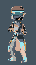

In [29]:
clustered_random = Kmean_random_process(pooled, 20)
cv2_imshow(clustered_random)

In [30]:
img16_random = pixelate(clustered_random, 40, 40)
cv2.imwrite('random.png', img16_random)

True